# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Nicholas Anaya Putra
- **Email:** nicholasanayaputraa@gmail.com
- **ID Dicoding:** [Input Username]

## Menentukan Pertanyaan Bisnis

- Kapan terakhir pelanggan melakukan transaksi?
- Seberapa sering seorang pelanggan melakukan pembelian dalam beberapa bulan terakhir?

## Import Semua Packages/Library yang Digunakan

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [4]:
day_df = pd.read_csv("/content/sample_data/dicoding/day.csv")
hour_df = pd.read_csv("/content/sample_data/dicoding/hour.csv")

day_df.head()
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- day_df memiliki data peminjaman per hari (agregasi harian) & day_df memiliki data peminjaman per jam.
- Dengan merge menggunakan dteday, hasilnya akan mengulang data harian (day_df) sebanyak jumlah jam dalam sehari (24 kali per dteday).

### Assessing Data

##### Menilai Tabel day

In [5]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
day_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [7]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [8]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


##### Menilai Tabel Hour

In [9]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [10]:
hour_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [11]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


**Insight:**
- Cek apakah ada data yang NaN (not a number) dari tabel day & hour
- Lalu print apakah ada data yang duplicate

### Cleaning Data

##### Membersihkan tabel Day

In [12]:
day_df.duplicated().sum()

0

In [13]:
day_df.drop_duplicates(inplace=True)

In [14]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [15]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [16]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


##### Membersihkan tabel hour

In [17]:
hour_df.duplicated().sum()

0

In [18]:
hour_df.drop_duplicates(inplace=True)

In [19]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [20]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [21]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- cek apakah ada data yang duplicate lalu hapus dari kedua tabel ( day & hour )
- cek missing value karena tidak ada yang NaN jadi tidak ada tabel yang di drop

## Exploratory Data Analysis (EDA)

##### Explore tabel day

In [22]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
296,297,2011-10-24,4,0,10,0,1,1,1,0.463333,0.457067,0.772083,0.118792,699,3488,4187
295,296,2011-10-23,4,0,10,0,0,0,1,0.421667,0.422333,0.741250,0.099513,1619,2762,4381
713,714,2012-12-14,4,1,12,0,5,1,1,0.281667,0.294192,0.642917,0.131229,429,5182,5611
434,435,2012-03-10,1,1,3,0,6,0,1,0.287500,0.277767,0.350417,0.225750,968,3150,4118
601,602,2012-08-24,3,1,8,0,5,1,2,0.702500,0.647100,0.615000,0.072146,1325,6257,7582


In [23]:
day_df.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [24]:
day_df.season.is_unique

False

In [25]:
day_df.groupby('season').agg({
    'cnt': 'nunique',
    'weekday': ["max", "min", "mean", "std", ]
})

cnt weekday                        
       nunique     max min      mean       std
season                                        
1          179       6   0  3.000000  2.033060
2          182       6   0  2.989130  1.999970
3          188       6   0  3.031915  1.994389
4          176       6   0  2.966292  2.008172

In [27]:
day_df.groupby(by="workingday").cnt.nunique().sort_values(ascending=False)

,cnt
workingday,
1,487
0,223


In [28]:
day_df.groupby(by="weekday").cnt.nunique().sort_values(ascending=False)

,cnt
weekday,
0,104
1,104
2,104
5,104
3,103
4,103
6,102


##### Explore tabel Hour

In [29]:
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
16218,16219,2012-11-13,4,1,11,12,0,2,1,1,0.34,0.3182,0.61,0.2836,16,180,196
3530,3531,2011-06-01,2,0,6,0,0,3,1,1,0.70,0.6667,0.79,0.1642,9,25,34
13915,13916,2012-08-08,3,1,8,0,0,3,1,1,0.70,0.6667,0.84,0.0000,12,46,58
4367,4368,2011-07-05,3,0,7,21,0,2,1,1,0.78,0.7424,0.62,0.2537,77,168,245
11782,11783,2012-05-11,2,1,5,3,0,5,1,1,0.46,0.4545,0.41,0.2836,5,8,13


In [30]:
hour_df.describe(include='all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


<Axes: >

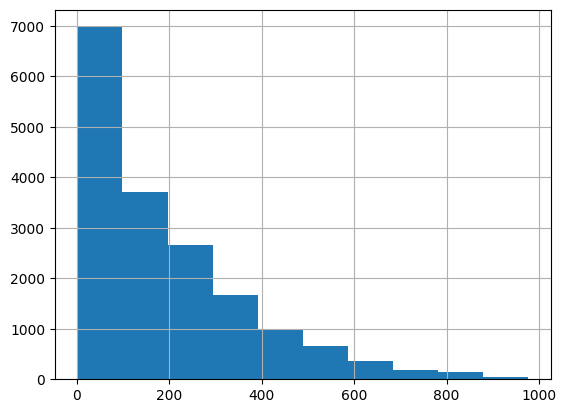

In [42]:
hour_df.cnt.hist()

In [47]:
cnt_median = hour_df["cnt"].median()
hour_df["status"] = hour_df["cnt"].apply(lambda x: "Ramai" if x >= cnt_median else "Sepi")
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,status
13734,13735,2012-07-31,3,1,7,11,0,2,1,1,0.76,0.7121,0.58,0.0000,54,170,224,Ramai
7500,7501,2011-11-14,4,0,11,3,0,1,1,1,0.44,0.4394,0.67,0.2836,4,3,7,Sepi
1575,1576,2011-03-11,1,0,3,2,0,5,1,3,0.34,0.3485,1.00,0.1045,2,3,5,Sepi
2122,2123,2011-04-03,2,0,4,7,0,0,0,1,0.32,0.3030,0.57,0.2239,13,20,33,Sepi
10009,10010,2012-02-27,1,1,2,2,0,1,1,1,0.26,0.2273,0.70,0.2985,0,4,4,Sepi


In [49]:
hour_df.groupby(by="status").cnt.count()

,cnt
status,
Ramai,8708
Sepi,8671


In [52]:
hour_df[hour_df.status == "Sepi"].sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,status
2008,2009,2011-03-29,2,0,3,13,0,2,1,1,0.34,0.3030,0.25,0.2985,24,80,104,Sepi
16474,16475,2012-11-24,4,1,11,4,0,6,0,1,0.26,0.2121,0.41,0.4478,1,2,3,Sepi
4473,4474,2011-07-10,3,0,7,7,0,0,0,1,0.70,0.6515,0.70,0.0896,27,38,65,Sepi
12145,12146,2012-05-26,2,1,5,6,0,6,0,1,0.62,0.5606,0.88,0.1940,6,25,31,Sepi
8673,8674,2012-01-02,1,1,1,5,1,1,0,1,0.28,0.2576,0.45,0.3284,1,3,4,Sepi


##### Menggabungkan data day_df & hour_df

In [56]:
day_hour_df = pd.merge(
    left=day_df,
    right=hour_df,
    how="inner",
    left_on="dteday",
    right_on="dteday"
)
day_hour_df.head()

,instant_x,dteday,season_x,yr_x,mnth_x,holiday_x,weekday_x,workingday_x,weathersit_x,temp_x,...,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y,status
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,0,1,0.24,0.2879,0.81,0.0,3,13,16,Sepi
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,0,1,0.22,0.2727,0.80,0.0,8,32,40,Sepi
2,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,0,1,0.22,0.2727,0.80,0.0,5,27,32,Sepi
3,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,0,1,0.24,0.2879,0.75,0.0,3,10,13,Sepi
4,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,0,1,0.24,0.2879,0.75,0.0,0,1,1,Sepi


In [69]:
day_hour_df.groupby(by="status").cnt_x.nunique().sort_values(ascending=False).head(10)

,cnt_x
status,
Sepi,696
Ramai,668


In [70]:
day_hour_df.to_csv("day_hour_df.csv", index=False)

**Insight:**
- Hari kerja memiliki lebih banyak variasi jumlah penyewaan sepeda dibanding akhir pekan. Ini menunjukkan bahwa peminjaman lebih beragam saat hari kerja, kemungkinan karena aktivitas komuter.
- Mayoritas penyewaan sepeda rendah, dengan sedikit periode sangat ramai. Klasifikasi “Ramai” dan “Sepi” menunjukkan pola peminjaman tidak merata sepanjang hari.

## Visualization & Explanatory Analysis

### Kapan terakhir pelanggan melakukan transaksi?

In [75]:
day_hour_df.sample(5)

,instant_x,dteday,season_x,yr_x,mnth_x,holiday_x,weekday_x,workingday_x,weathersit_x,temp_x,...,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y,status
17373,731,2012-12-31,1,1,12,0,1,1,2,0.215833,...,1,2,0.26,0.2727,0.48,0.1343,10,112,122,Sepi
3525,151,2011-05-31,2,0,5,0,2,1,1,0.775000,...,1,1,0.78,0.7424,0.62,0.1045,39,246,285,Ramai
13226,557,2012-07-10,3,1,7,0,2,1,2,0.720833,...,1,2,0.70,0.6667,0.74,0.1045,31,489,520,Ramai
12338,520,2012-06-03,2,1,6,0,0,0,1,0.602500,...,0,1,0.50,0.4848,0.68,0.1045,6,29,35,Sepi
11602,489,2012-05-03,2,1,5,0,4,1,2,0.560000,...,1,1,0.66,0.6212,0.61,0.1940,63,220,283,Ramai


In [77]:
day_hour_df['dteday'] = pd.to_datetime(day_hour_df['dteday'])
last_transaction = day_hour_df['dteday'].max()
print("Tanggal terakhir pelanggan melakukan transaksi:", last_transaction)

Tanggal terakhir pelanggan melakukan transaksi: 2012-12-31 00:00:00


### Seberapa sering seorang pelanggan melakukan pembelian dalam beberapa bulan terakhir?

In [78]:
last_date = day_hour_df['dteday'].max()
three_months_ago = last_date - pd.DateOffset(months=3)
day_hour_df_recent = day_hour_df[day_hour_df['dteday'] >= three_months_ago]

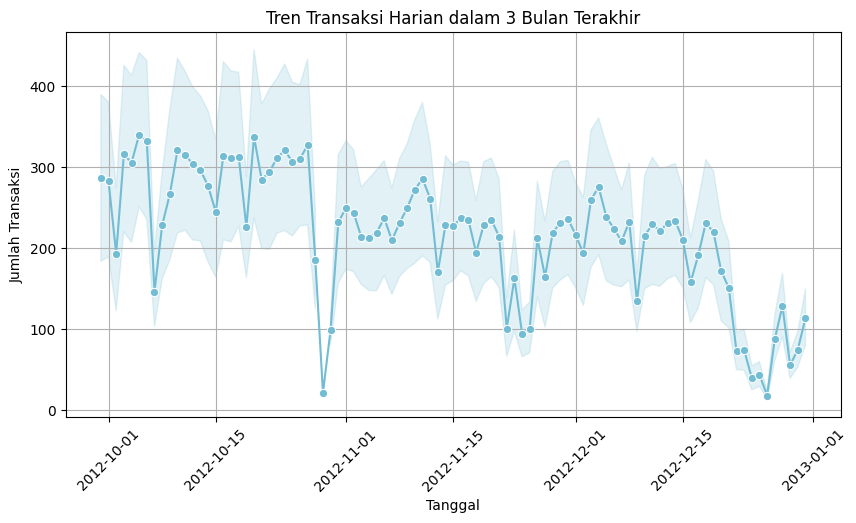

In [87]:
plt.figure(figsize=(10,5))
sns.lineplot(data=day_hour_df_recent, x='dteday', y='cnt_y', marker='o', color='#72BCD4')
plt.title('Tren Transaksi Harian dalam 3 Bulan Terakhir')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Transaksi')
plt.xticks(rotation=45)
plt.grid()
plt.show()

<ipython-input-90-3fe88adc27a7>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_avg, x='mnth_x', y='cnt_y', palette='viridis')


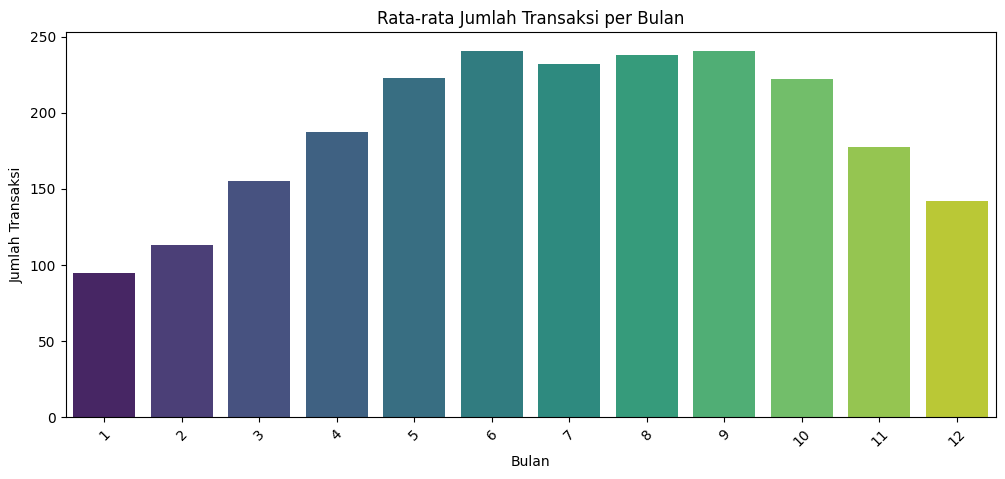

In [90]:
monthly_avg = day_hour_df.groupby('mnth_x')['cnt_y'].mean().reset_index()

plt.figure(figsize=(12,5))
sns.barplot(data=monthly_avg, x='mnth_x', y='cnt_y', palette='viridis')
plt.title('Rata-rata Jumlah Transaksi per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Transaksi')
plt.xticks(rotation=45)
plt.show()

<ipython-input-96-62891a391dfe>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=status_counts.index, y=status_counts.values, palette=['red', 'green'])


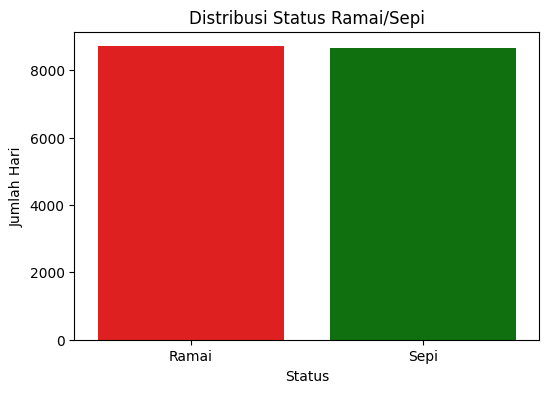

In [96]:
status_counts = day_hour_df['status'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=status_counts.index, y=status_counts.values, palette=['red', 'green'])
plt.title('Distribusi Status Ramai/Sepi')
plt.xlabel('Status')
plt.ylabel('Jumlah Hari')
plt.show()

### Clustering menggunakan Manual Grouping

In [110]:
def categorize_transaction(cnt):
    if cnt < 100:
        return "Sepi"
    elif 100 <= cnt <= 300:
        return "Sedang"
    else:
        return "Ramai"

day_hour_df['transaction_category'] = day_hour_df['cnt_y'].apply(categorize_transaction)

In [111]:
print(day_hour_df[['cnt_y', 'transaction_category']].head())

   cnt_y transaction_category
0     16                 Sepi
1     40                 Sepi
2     32                 Sepi
3     13                 Sepi
4      1                 Sepi


<ipython-input-112-c599ec3cefe4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


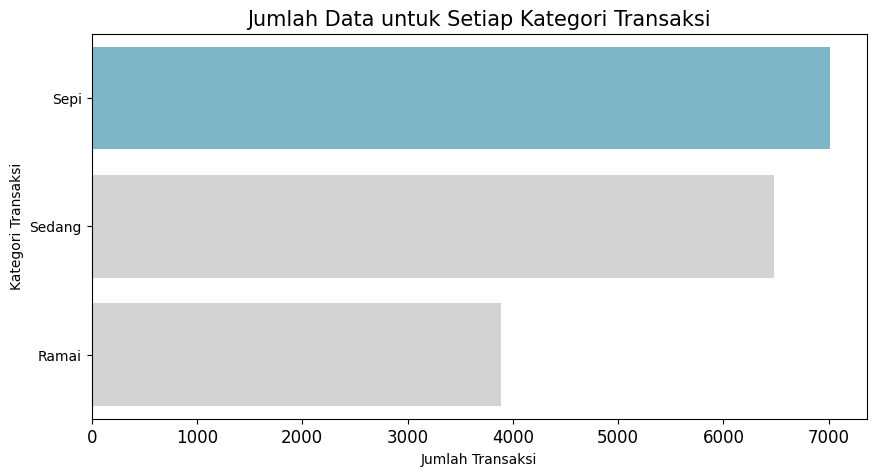

In [112]:
plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3"]

sns.barplot(
    y=day_hour_df['transaction_category'].value_counts().index,
    x=day_hour_df['transaction_category'].value_counts().values,
    palette=colors_,
    orient="h"
)

plt.title("Jumlah Data untuk Setiap Kategori Transaksi", loc="center", fontsize=15)
plt.xlabel("Jumlah Transaksi")
plt.ylabel("Kategori Transaksi")
plt.tick_params(axis='x', labelsize=12)
plt.show()

**Insight:**
- Tren transaksi harian fluktuatif, dipengaruhi faktor musiman dan promosi. Beberapa hari mengalami lonjakan signifikan, sementara lainnya cenderung sepi.
-  Rata-rata transaksi bulanan bervariasi, menunjukkan musim dan tren pelanggan berperan dalam tingkat penjualan.

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1 : Terakhir pelanggan melakukan transaksi pada 2012-12-31 00:00:00, berdasarkan tren transaksi harian dalam tiga bulan terakhir. Grafik menunjukkan adanya fluktuasi transaksi, dengan beberapa puncak aktivitas di hari tertentu.
- Conclution pertanyaan 2 : Frekuensi pembelian dalam beberapa bulan terakhir cukup bervariasi. Rata-rata jumlah transaksi per bulan menunjukkan pola tertentu, dengan beberapa bulan mengalami lonjakan signifikan. Analisis status menunjukkan lebih banyak hari dengan transaksi sepi dibandingkan sebaliknya.